Starting memory-efficient processing...
Processed a chunk... Found 63 relevant complaints.
Processed a chunk... Found 167 relevant complaints.
Processed a chunk... Found 135 relevant complaints.
Processed a chunk... Found 93 relevant complaints.
Processed a chunk... Found 103 relevant complaints.
Processed a chunk... Found 183 relevant complaints.
Processed a chunk... Found 220 relevant complaints.
Processed a chunk... Found 136 relevant complaints.
Processed a chunk... Found 278 relevant complaints.
Processed a chunk... Found 349 relevant complaints.
Processed a chunk... Found 483 relevant complaints.
Processed a chunk... Found 471 relevant complaints.
Processed a chunk... Found 566 relevant complaints.
Processed a chunk... Found 752 relevant complaints.
Processed a chunk... Found 1067 relevant complaints.
Processed a chunk... Found 1424 relevant complaints.
Processed a chunk... Found 1675 relevant complaints.
Processed a chunk... Found 2931 relevant complaints.
Processed a chunk... F

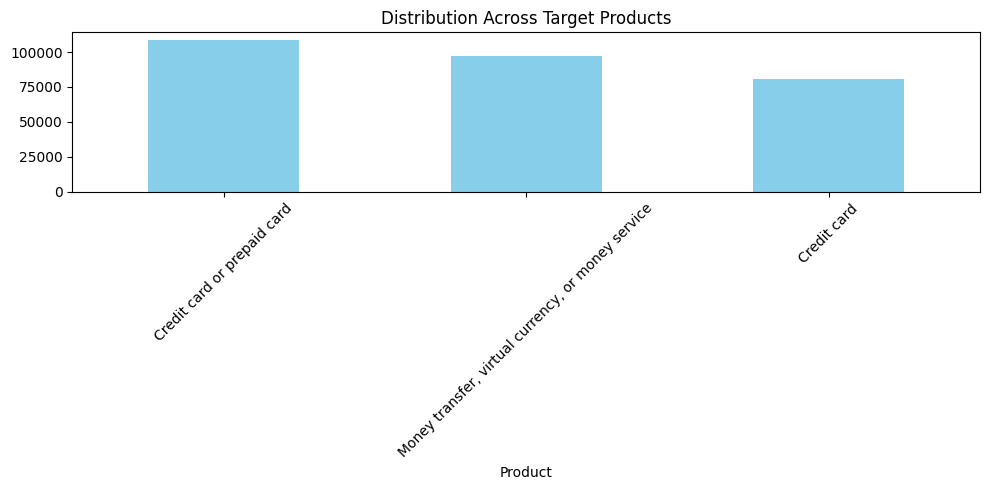

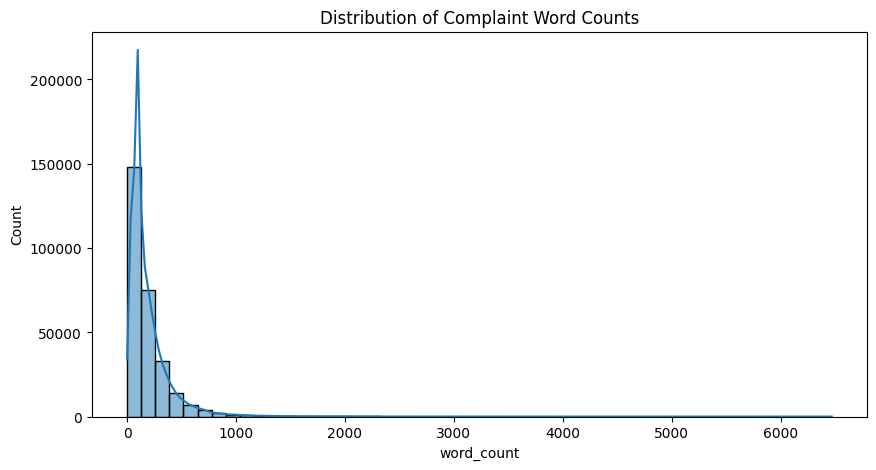

Success! Cleaned data saved to C:/Users/natna/Downloads/KAIM WEEK-7/Intelligent-Complaint-Analysis-for-Financial-Services/data/processed/filtered_complaints.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

# 1. Define paths and target products
file_path = 'C:/Users/natna/Downloads/KAIM WEEK-7/Intelligent-Complaint-Analysis-for-Financial-Services/data/raw/complaints.csv'
processed_path = 'C:/Users/natna/Downloads/KAIM WEEK-7/Intelligent-Complaint-Analysis-for-Financial-Services/data/processed/filtered_complaints.csv'
os.makedirs('data/processed', exist_ok=True)

# Specified products from the challenge document [cite: 139]
target_products = [
    "Credit card", 
    "Credit card or prepaid card",
    "Personal loan", 
    "Savings account", 
    "Money transfer, virtual currency, or money service"
]

# 2. Memory-Efficient Loading and Filtering
filtered_chunks = []

print("Starting memory-efficient processing...")

# We only load the columns we actually need to save RAM
keep_cols = ['Product', 'Consumer complaint narrative', 'Issue', 'Sub-issue', 'Company', 'State', 'Date received', 'Complaint ID']

try:
    # Read in chunks of 50,000 rows [cite: 56]
    for chunk in pd.read_csv(file_path, chunksize=50000, usecols=keep_cols, low_memory=False):
        # Filter for target products and non-empty narratives [cite: 139, 140]
        temp_filter = chunk[
            (chunk['Product'].isin(target_products)) & 
            (chunk['Consumer complaint narrative'].notna())
        ].copy()
        
        filtered_chunks.append(temp_filter)
        print(f"Processed a chunk... Found {len(temp_filter)} relevant complaints.")

    # Combine all filtered chunks into one DataFrame
    df = pd.concat(filtered_chunks, ignore_index=True)
    print(f"\nFiltering complete. Total records kept: {len(df)}")

    # 3. Clean text narratives [cite: 141, 144, 145]
    def clean_text(text):
        text = str(text).lower() # Lowercasing [cite: 144]
        text = re.sub(r'i am writing to file a complaint', '', text) # Remove boilerplate [cite: 145]
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Remove special characters [cite: 145]
        return " ".join(text.split())

    print("Cleaning text narratives...")
    df['cleaned_narrative'] = df['Consumer complaint narrative'].apply(clean_text)

    # 4. EDA: Visualizations [cite: 134, 135, 136]
    # Distribution of complaints [cite: 135]
    plt.figure(figsize=(10, 5))
    df['Product'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribution Across Target Products')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Narrative length analysis [cite: 136]
    df['word_count'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(10, 5))
    sns.histplot(df['word_count'], bins=50, kde=True)
    plt.title('Distribution of Complaint Word Counts')
    plt.show()

    # 5. Save final result 
    df.to_csv(processed_path, index=False)
    print(f"Success! Cleaned data saved to {processed_path}")

except Exception as e:
    print(f"An error occurred: {e}")